In [1]:
import numpy as np
import networkx as nx
import torch
from experiments.sol_propagator import PDESolutionPropogator
from experiments.visuallization_utils import plot_pde_sols
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
A_circle = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
])
A_star = np.array([
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0]
]
)
circle = nx.from_numpy_array(A_circle)
star = nx.from_numpy_array(A_star)
L_circle = nx.normalized_laplacian_matrix(circle).tocsc()
L_star = nx.normalized_laplacian_matrix(star).tocsc()
oper_circle = PDESolutionPropogator(L_circle, device, eps=1e-5)
oper_star = PDESolutionPropogator(L_star, device, eps=1e-5)
print('circle spectrum:', oper_circle.operator.lam)
print('star spectrum:', oper_star.operator.lam)
graphs = [circle, star]

circle spectrum: tensor([-6.6067e-09,  1.0000e+00,  1.0000e+00,  2.0000e+00])
star spectrum: tensor([0., 1., 1., 2.])


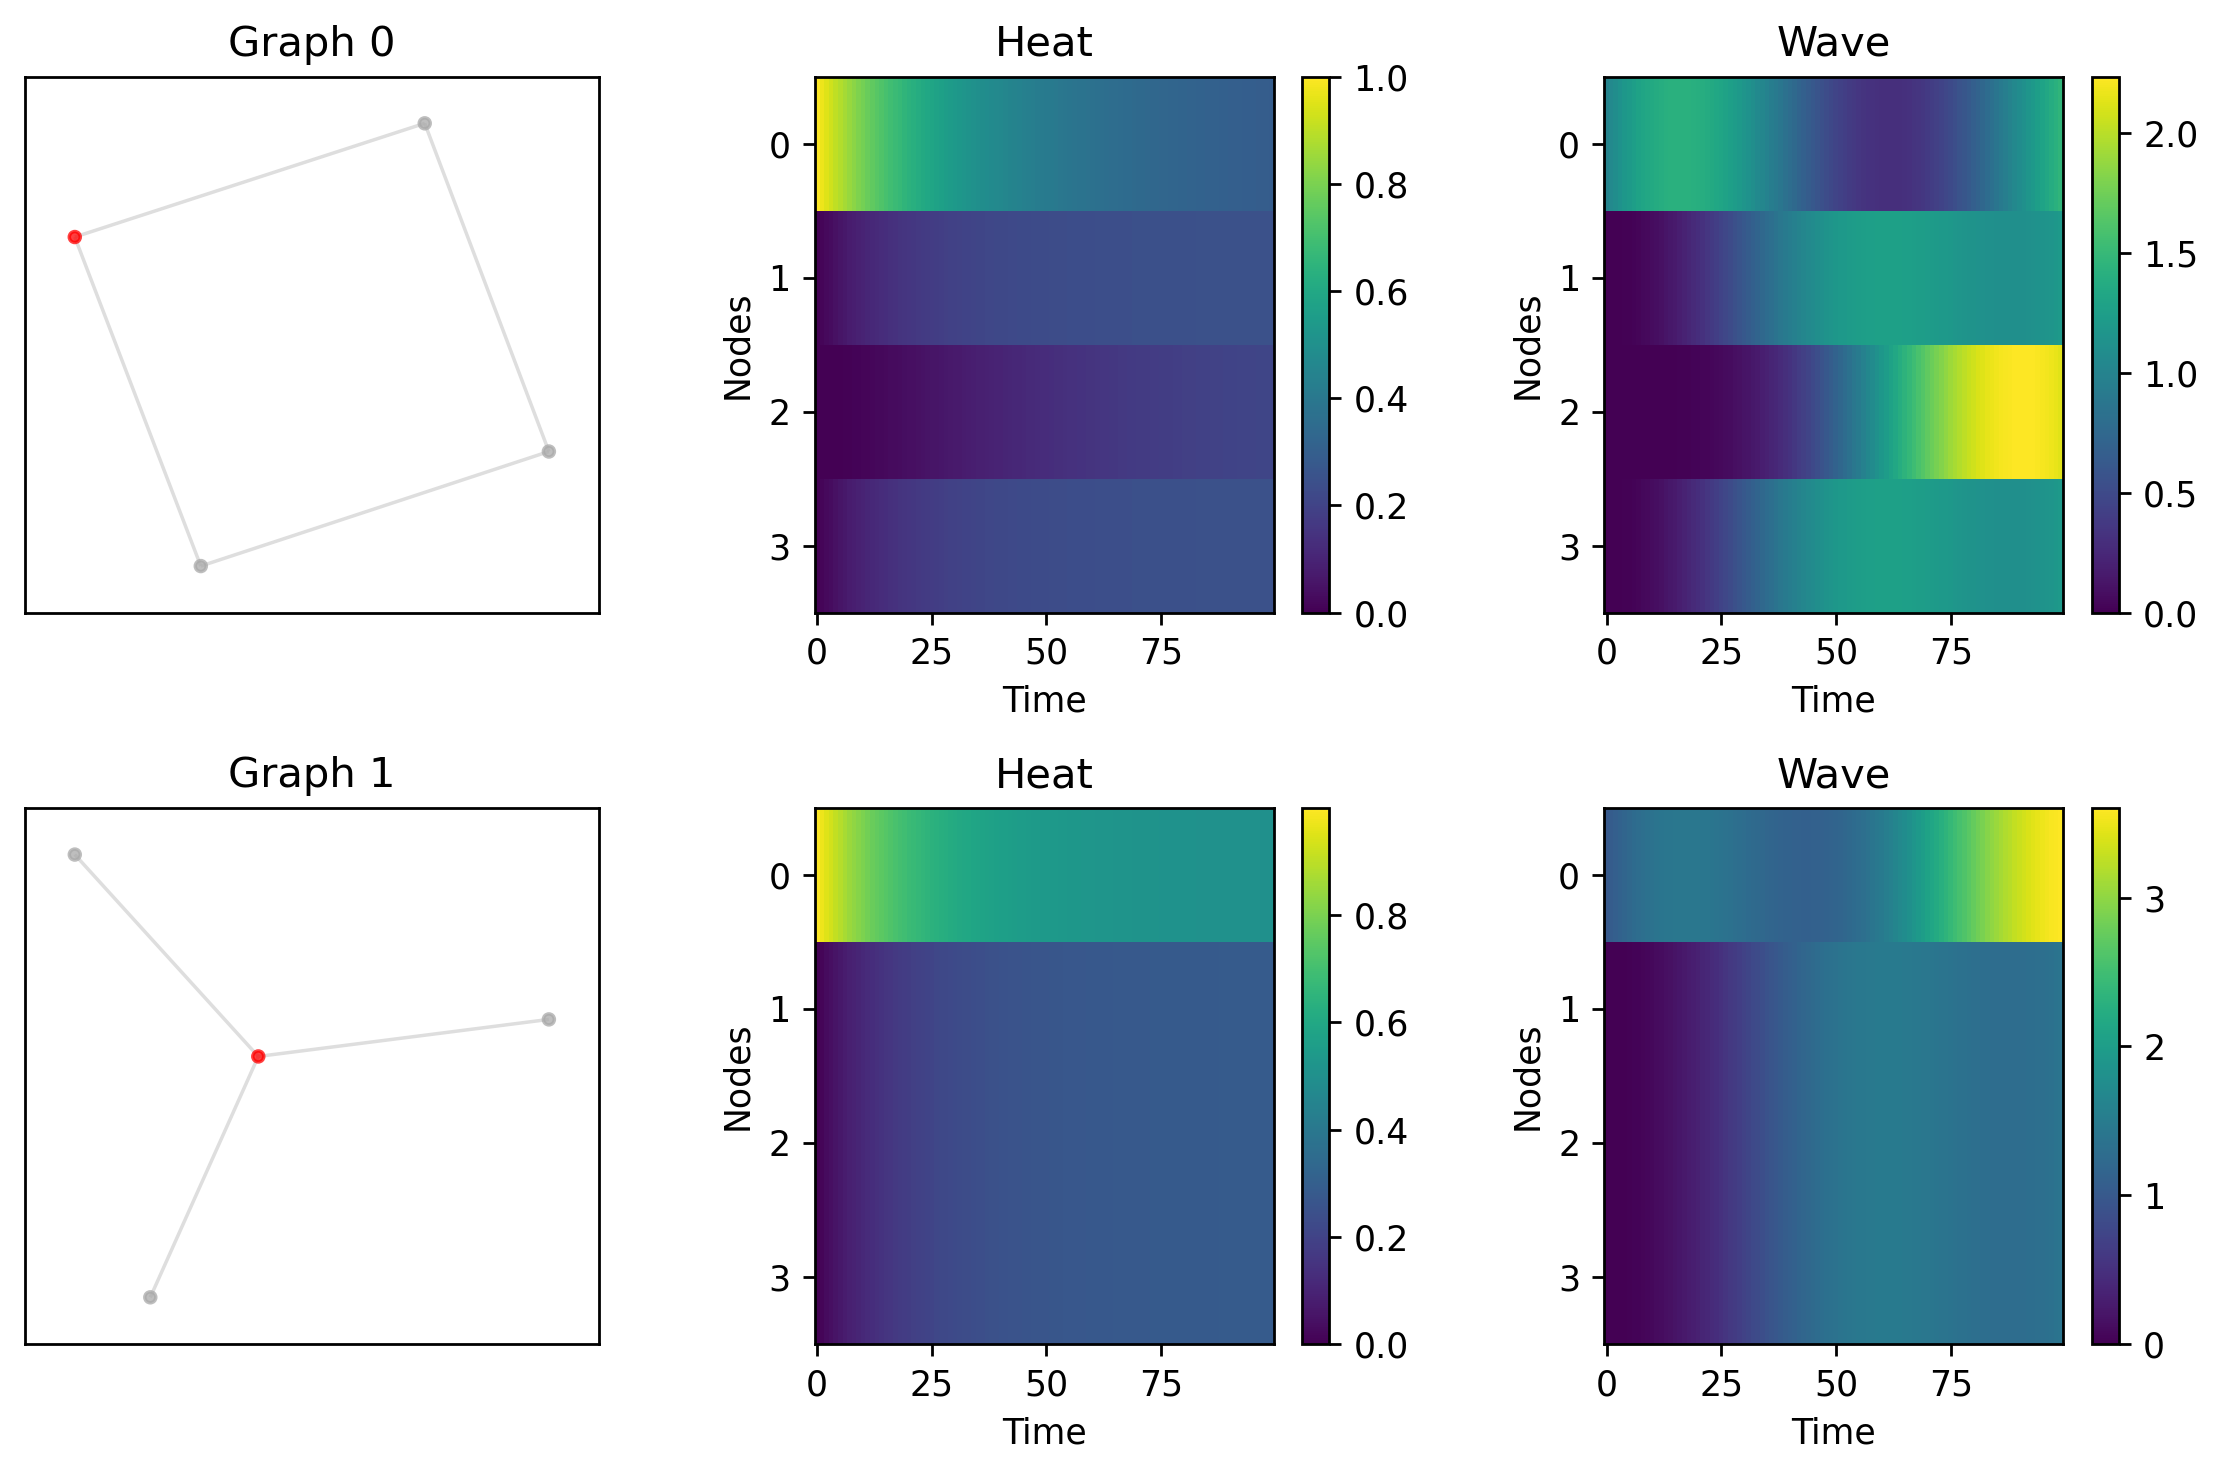

In [3]:
plot_pde_sols(graphs, device, c=.5, dirac_ids=[0])

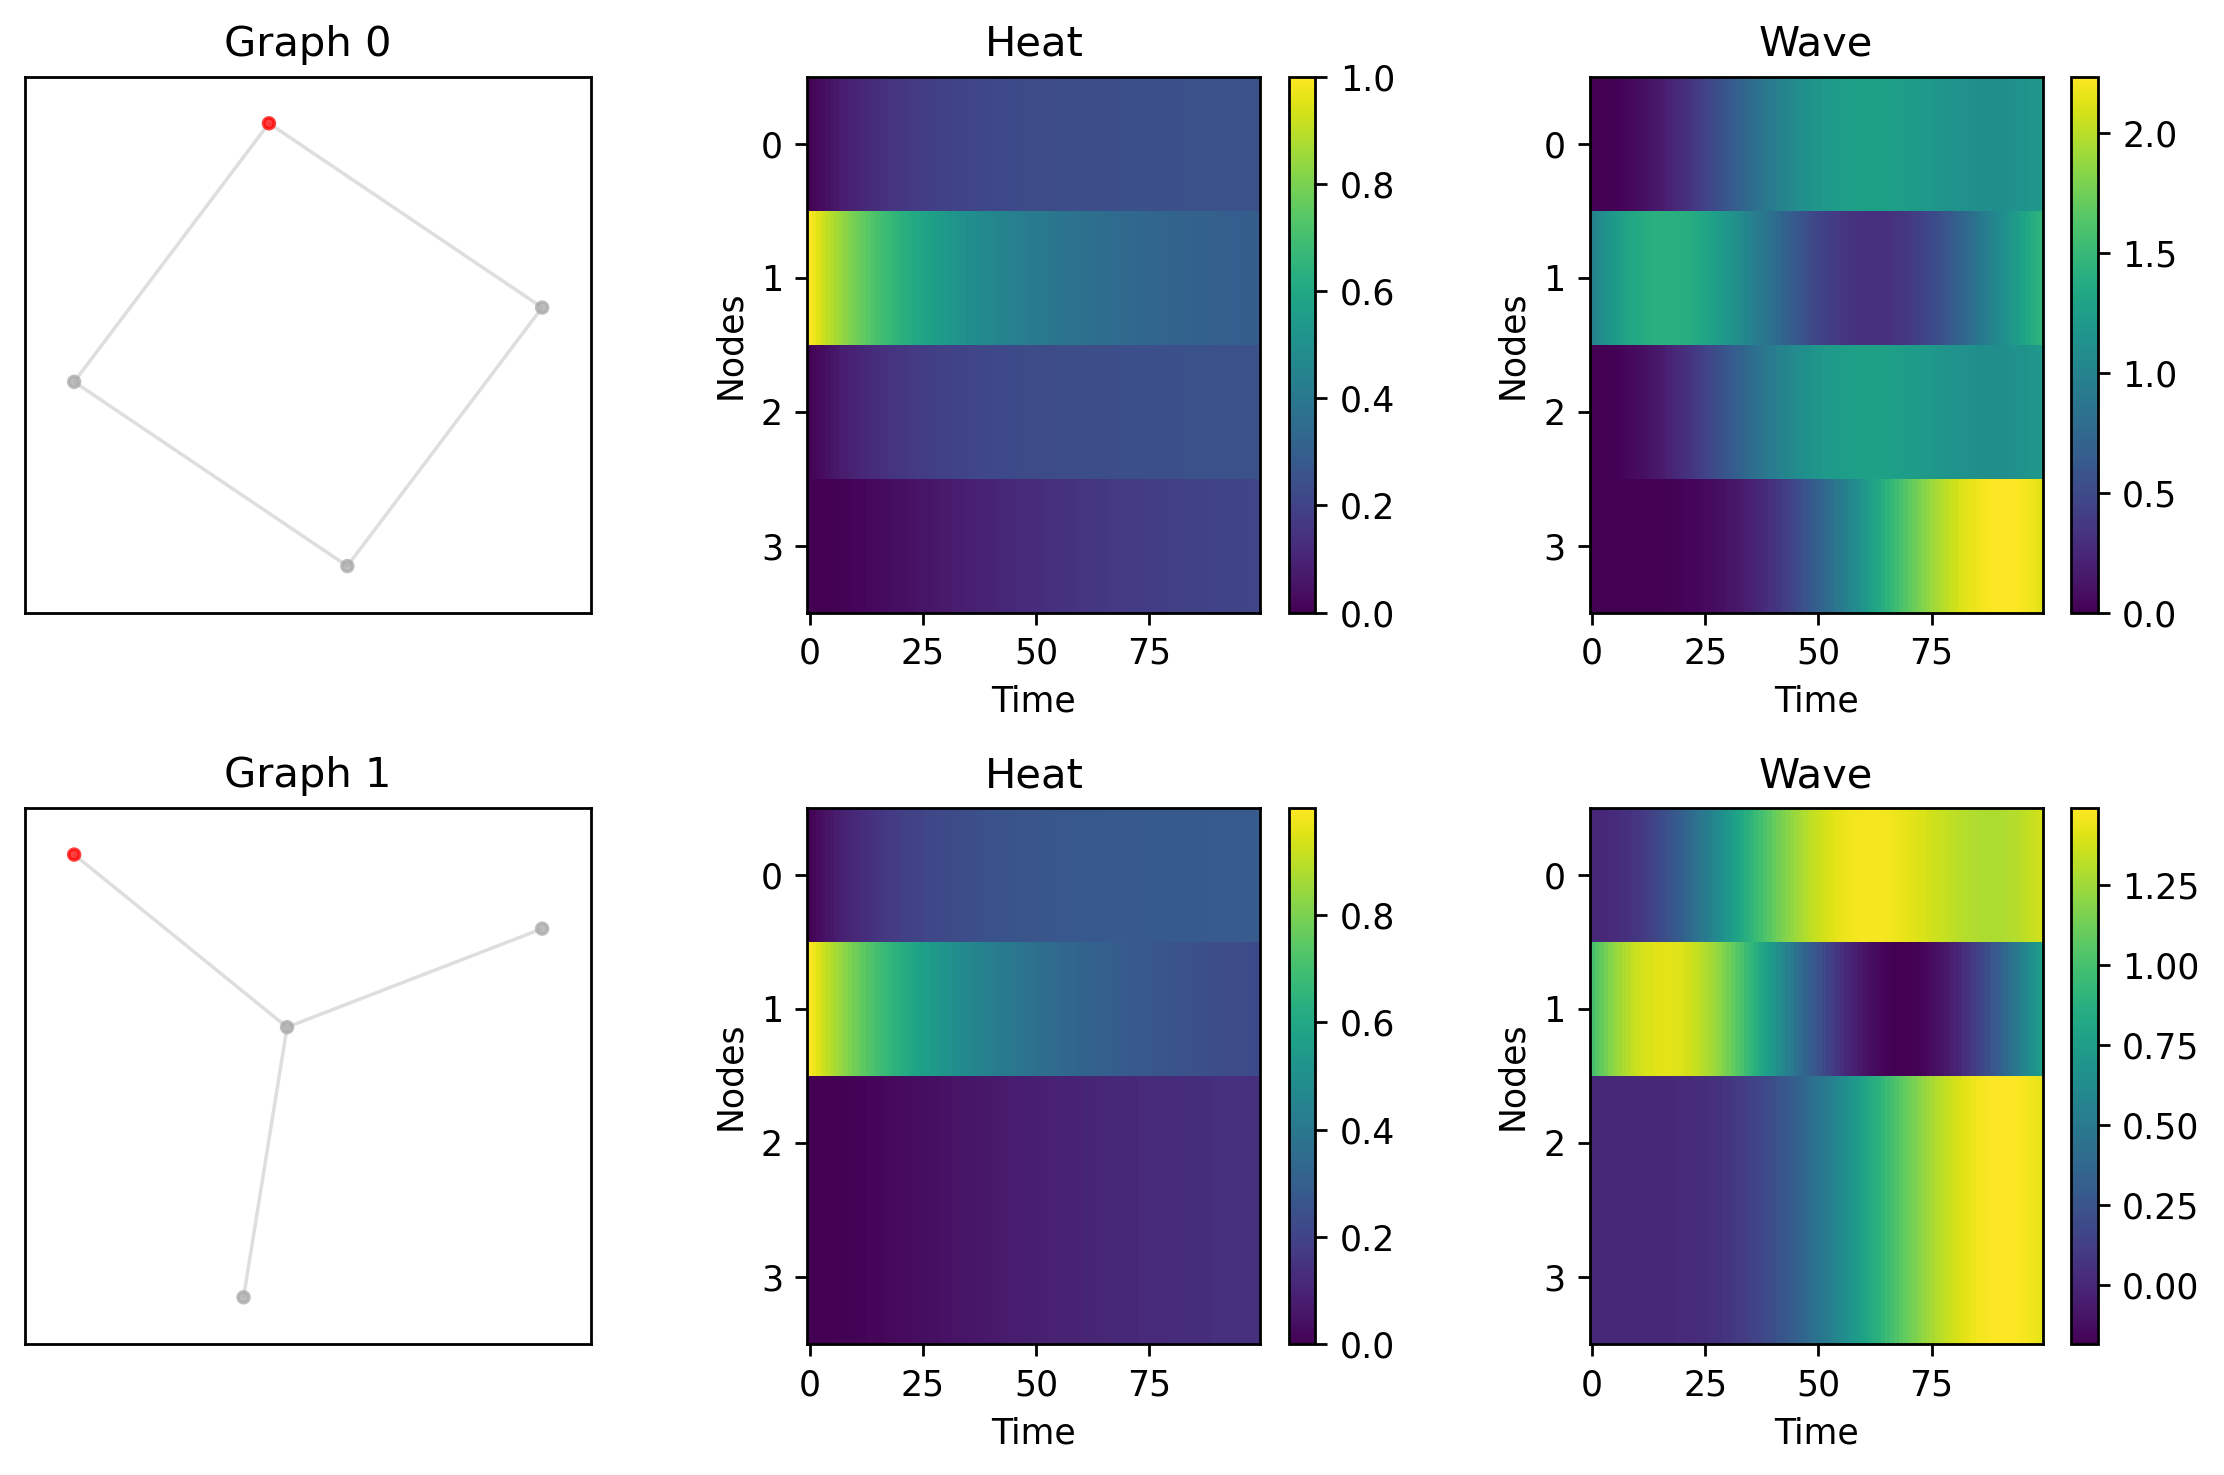

In [4]:
plot_pde_sols(graphs, device, c=.5, dirac_ids=[1])